<a href="https://colab.research.google.com/github/smmurdock/Neural-Network-Seedling-Images/blob/main/D604_Task_1_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images

/content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images


## A. Scenario Selection

### A1. Research Question

> Provide one research question that you will answer using neural network models and computer vision techniques. Be sure the research question is relevant to a real-world organizational situation related to the images, video, and audio captured in your chosen dataset.

**Research Question:** Can a deep learning/neural network model be trained on a dataset of RGB images to accurately classify 12 different species of plant seedlings, thereby providing an effective automated solution for botanists and farmers to differentiate between crops and weeds?

### A2. Objectives or Goals

> Define the objectives or goals of the data analysis. Be sure each objective or goal is reasonable within the scope of the research question and is represented in the available data.

The primary objectives for this project are:

* **Prepare the Dataset:** Load and preprocess the 4,750 RGB images and their corresponding labels. This includes normalizing the pixel values and splitting the data into training, validation, and testing sets to ensure the model can be properly trained and evaluated.

* **Develop a Classification Model:** Build, train, and fine-tune a neural network that can learn the distinct visual features of the 12 different plant species from the provided images.

* **Evaluate Model Performance:** Assess the final model's ability to accurately classify the seedling images using key performance metrics such as accuracy, precision, and recall. The goal is to determine the model's effectiveness for this real-world task.

### A3. Neural Network Type

> Identify an industry-relevant type of neural network capable of performing an image, audio, or video classification task that can be trained to produce useful predictions on image sequences on the selected dataset.

For the task of classifying plant seedlings from the provided dataset of RGB images, the most suitable and **industry-relevant** type of neural network is a **Convolutional Neural Network (CNN)**.

This choice is based on the specific requirements of the task and the nature of the data. The prompt asks for a network capable of performing an **image classification task**, and CNNs are the gold standard for this purpose. They are specifically designed to process and learn from pixel data, making them exceptionally effective at identifying the complex patterns, textures, and shapes that distinguish one image from another.

### A4. Neural Netowork Justification

> Justify your choice of neural network in part A3.


In an industrial or commercial context—whether in agricultural tech, medical imaging, or autonomous systems—CNNs are the go-to solution for computer vision challenges. Their ability to automatically extract hierarchical features from images (from simple edges to complex shapes like leaves) makes them powerful and adaptable. Therefore, a CNN is not just a capable choice; it is the most professionally relevant and proven type of neural network for training on this image dataset to produce useful, real-world predictions.

**Convolutional Neural Network (CNN)** is the ideal choice for this task for several key reasons:

* **Hierarchical Feature Extraction:** CNNs are specifically designed to process image data. They automatically learn a hierarchy of features, starting with simple edges and colors in the initial layers and building up to more complex features, like leaf shapes and textures, in deeper layers. This is essential for identifying the subtle visual differences between the 12 seedling species.
Parameter Efficiency: Unlike standard neural networks, CNNs use shared weights and pooling layers. This drastically reduces the total number of parameters in the model, making it more computationally efficient and less likely to overfit the training data—a critical advantage for a dataset of this size (4,750 images).

* **Spatial Invariance:** The architecture of a CNN provides a degree of translational invariance, meaning it can recognize a plant or a feature even if its position or orientation in the image varies. This makes the model robust and better able to generalize from the training images to new, unseen images of seedlings.

* **Proven Effectiveness:** The scenario notes that the past decade has seen substantial progress in image analysis using neural networks. CNNs are the state-of-the-art architecture that has driven this progress, consistently achieving top performance on image classification tasks across various industries.


## B. Image Dataset

> Perform exploratory data analysis on the chosen image dataset and provide screenshots of the following:

### B1. Exploratory Data Analysis (EDA)

In [2]:
# --- Environment setup ---
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Set the environment for reproducibility
np.random.seed(6)

**Load the Dataset**

The dataset consists of two files:
- `images.npy`: Contains 4,750 RBG images in numpy array format
- `labels.csv`: Contains the corresponding labels for each image

In [4]:
# --- Load the data ---
images = np.load('images.npy')
labels = pd.read_csv('labels.csv')

#### B1a. Data Visualization

> Provide a visualization for the distribution of the different classes

In this section, we perform exploratory data analysis on the plant seedling
dataset to understand the distribution of images across the 12 different
plant species classes. This analysis helps us identify any potential class
imbalance issues that may need to be addressed during model training.

In [5]:
# --- Display basic information about the data ---
print("Dataset Overview:")
print("=" * 60)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"\nColumn name(s): {labels.columns.tolist()}")
print(f"\nFirst 10 labels:")
print(labels.head(5))

Dataset Overview:
Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)

Column name(s): ['Label']

First 10 labels:
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


**Class Distribution Analysis**

We analyze the distribution of images across all 12 plant species to understand whether the dataset is balanced or if certain classes are over/under-represented.

In [6]:
# --- Class Distribution Analysis ---
# Get value counts for each class
class_distribution = labels.iloc[:, 0].value_counts()

print("Class Distribution Summary:")
print("=" * 60)
print(class_distribution)
print("\n" + "=" * 60)
print(f"Total images: {class_distribution.sum()}")
print(f"Number of classes: {len(class_distribution)}")
print(f"Mean images per class: {class_distribution.mean():.2f}")
print(f"Standard deviation: {class_distribution.std():.2f}")
print(f"Min: {class_distribution.min()} | Max: {class_distribution.max()}")

Class Distribution Summary:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Total images: 4750
Number of classes: 12
Mean images per class: 395.83
Standard deviation: 154.22
Min: 221 | Max: 654


**Class Balance Analysis:**

To assess whether the dataset has class imbalance issues, we calculate the balance ratio (minimum class count / maximum class count). A ratio closer to 1.0 indicates better balance.

In [7]:
# --- Balance Analysis ---
# Calculate balance metrics
balance_ratio = class_distribution.min() / class_distribution.max()

print("Class Balance Analysis:")
print("=" * 60)
print(f"Balance ratio (min/max): {balance_ratio:.3f}")
print(f"Range (max - min): {class_distribution.max() - class_distribution.min()}")

# Provide interpretation
if balance_ratio > 0.8:
    balance_status = "Well-balanced"
    recommendation = "No special handling required"
elif balance_ratio > 0.5:
    balance_status = "Moderately imbalanced"
    recommendation = "Consider class weights or augmentation"
else:
    balance_status = "Significantly imbalanced"
    recommendation = "Strongly recommend class weights and targeted augmentation"

print(f"\nStatus: {balance_status}")
print(f"Recommendation: {recommendation}")
print("=" * 60)

Class Balance Analysis:
Balance ratio (min/max): 0.338
Range (max - min): 433

Status: Significantly imbalanced
Recommendation: Strongly recommend class weights and targeted augmentation


**Visualization: Class Distribution Bar Chart**

The following bar chart visualizes the number of images in each of the 12 plant species categories. The red dashed line represents the mean number of images per class.

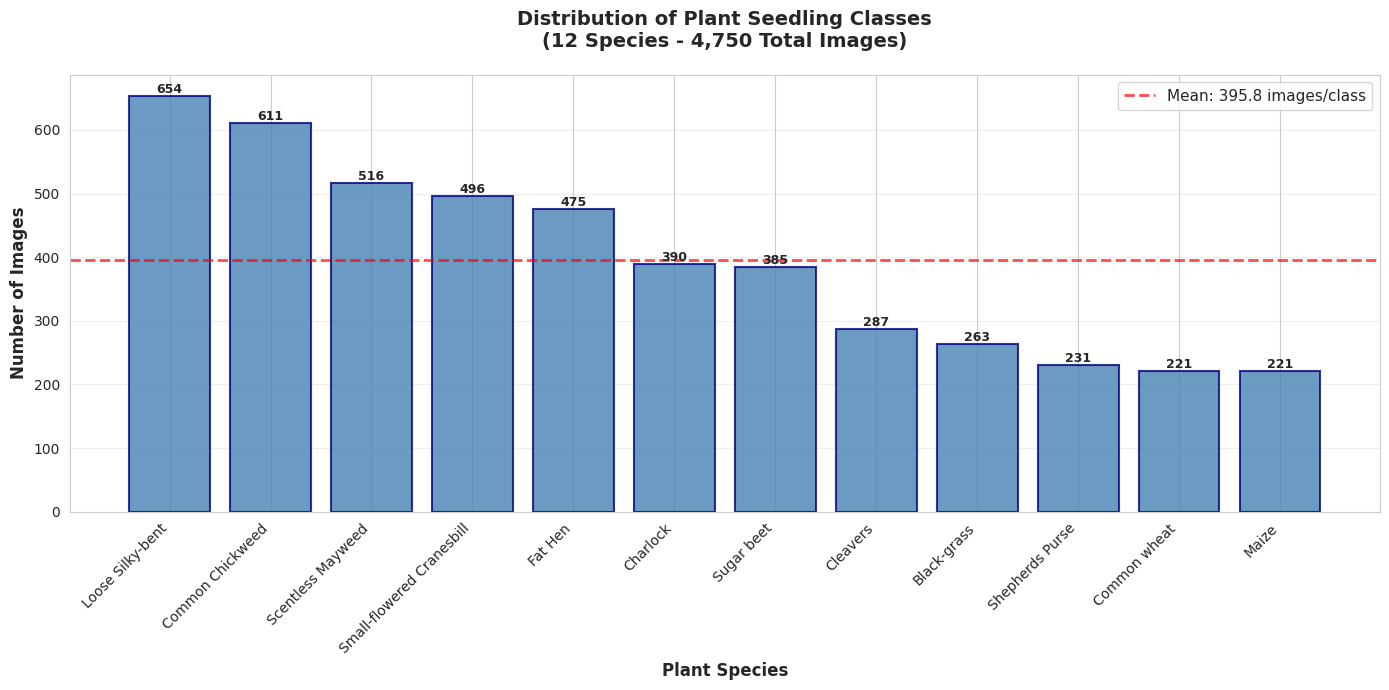

In [8]:
# --- Plot the distribution of classes to check for balance ---
# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Create bars
bars = ax.bar(range(len(class_distribution)),
               class_distribution.values,
               color='steelblue',
               edgecolor='navy',
               alpha=0.8,
               linewidth=1.5)

# Customize the plot
ax.set_xlabel('Plant Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Plant Seedling Classes\n(12 Species - 4,750 Total Images)',
             fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(class_distribution)))
ax.set_xticklabels(class_distribution.index, rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar, value in zip(bars, class_distribution.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean line
mean_value = class_distribution.mean()
ax.axhline(y=mean_value, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_value:.1f} images/class', alpha=0.7)
ax.legend(loc='upper right', fontsize=11)

# Grid
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Key Findings:**

Based on the class distribution analysis:

* The dataset containts 4,750 images across 12 plant species.
* The average number of images per class is 395.8.
* Class balance ratio: 0.338

**Implications for Model Training:**

We will need to augment the data to fix the class balance ratio as part of our preprocessing to be ready for training a neural network.

#### B1b. Sample Images

> Provide sample images with associated labels

To better understand the visual characteristics of each plant species in our dataset, we display sample images from each of the 12 classes. This visualization helps identify visual patterns, image quality, and potential issues in classification.

In [9]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [10]:
# --- Get unique classes ---
# Get unique classes
unique_classes = labels['Label'].unique()
n_classes = len(unique_classes)

print(f"Displaying sample images from {n_classes} plant species classes:")
print(f"Total images in dataset: {len(images)}")

Displaying sample images from 12 plant species classes:
Total images in dataset: 4750


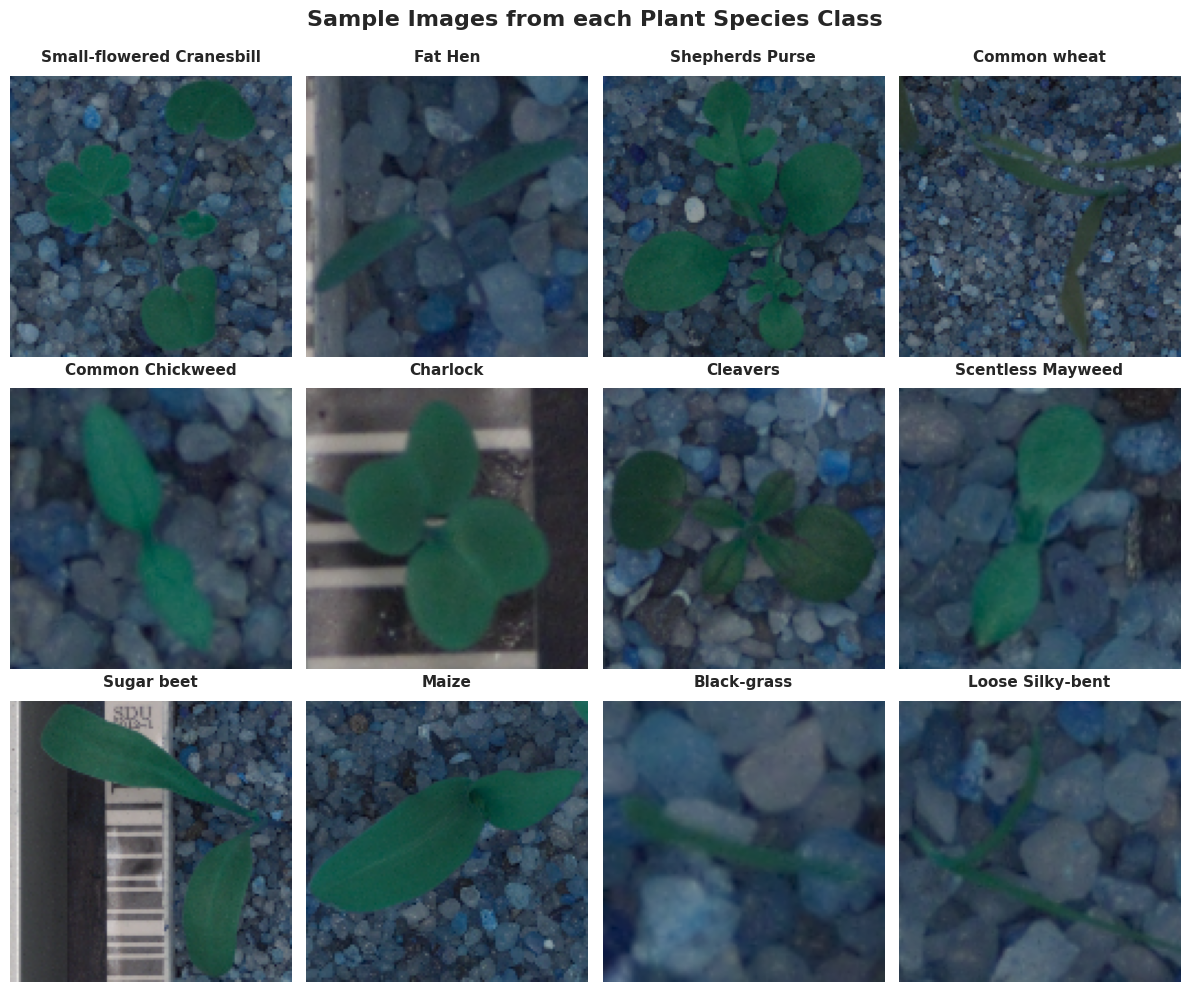

In [11]:
# --- Plot one unique image from each class ---
# Create a figure to display sample images
fig, axes = plt.subplots(3, 4, figsize=(12, 10))
fig.suptitle('Sample Images from each Plant Species Class', fontsize=16,
             fontweight='bold', y=0.995)

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through each class
for idx, class_name in enumerate(unique_classes):
    # Get indices for this class
    class_indices = labels[labels['Label'] == class_name].index.tolist()

    # Randomly select one image from this class
    sample_idx = random.choice(class_indices)
    sample_image = images[sample_idx]

    # Display the image
    axes[idx].imshow(sample_image)
    axes[idx].set_title(f'{class_name}', fontsize=11, fontweight='bold',
                        pad=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### B2. Data Augmentation and Justification

> Perform data augmentation and justify the steps taken to augment the images.

To address the significant class imbalance in our dataset, we will use **data augmentation**. This technique artificially expands the dataset by creating modified copies of the existing images. By applying random transformations, we can teach the model to generalize better and prevent it from becoming biased towards the more dominant classes. It also makes our model more robust by training it on a wider variety of image variations, which helps prevent _overfitting_, where the model learns the data too well to be of use for new, unseen data.

Instead of augmenting all images, we will specifically **oversample the minority classes**.

The process is as follows:

1. Identify the number of images in the majority class (the class with the most samples).

2. For each minority class, we will generate new, augmented images until its sample count matches the majority class.

3. The majority class itself will not be augmented.

This method ensures that our final training dataset is perfectly balanced, preventing the model from developing a bias towards the more dominant classes. It also makes our model more robust by training it on a wider variety of image variations.

Here are the specific augmentation techniques we'll use:

* **Rotation:** Seedlings in the real world are not always perfectly upright. Randomly rotating the images (up to 40 degrees) helps the model learn to recognize a plant regardless of its orientation.

* **Width and Height Shift:** This shifts the image horizontally or vertically. It simulates the effect of the plant not being perfectly centered in the frame.

* **Shear Transformation:** A shear transformation slants the shape of the image. This mimics what happens when a photo is taken from a slight angle, rather than directly overhead.

* **Zoom:** Randomly zooming in on images forces the model to learn to identify seedlings from different distances.

* **Horizontal and Vertical Flips:** Flipping the images horizontally and vertically creates believable variations of the original images, as a plant can be viewed from its mirror angle.

* **Fill Mode:** When a transformation like a rotation occurs, some pixels might be left empty. We'll use the `'nearest'` fill mode, which fills these empty areas with the nearest pixel values, creating a seamless image.

We'll implement this using Python and TensorFlow's `ImageDataGenerator()`.

---

**Resource:** [ImageDataGenerator (TensorFlow)](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [12]:
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings from the image generator
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
# --- Prepare Labels (Label Encoding) ---
# Check if the first label is a string (text). If so, we need to encode them.
if isinstance(labels.iloc[0, 0], str):
    print("Labels are text. Applying Label Encoding.")
    label_encoder = LabelEncoder()
    # .values returns a NumPy array, .ravel() ensures it's 1D
    labels_encoded = label_encoder.fit_transform(labels.iloc[:, 0].values.ravel())
    # Keep the mapping from number to class name for later
    class_names = label_encoder.classes_
    print("Class names:", class_names)
else:
    print("Labels are already encoded as numbers.")
    labels_encoded = labels.values.ravel() # Ensure it's a 1D NumPy array

Labels are text. Applying Label Encoding.
Class names: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Define Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [15]:
# --- Perform Oversampling / Adding Augmented Data ---
# Find the number of samples in the largest class
labels_series = pd.Series(labels_encoded)
class_counts = labels_series.value_counts()
max_samples = class_counts.max()

print(f"The majority class has {max_samples} samples.")

# These lists will hold the new, balanced data
X_balanced_list = []
y_balanced_list = []

# Loop through each class (0 through 11)
for class_index in sorted(labels_series.unique()):
    # Get all images for the current class from the original dataset
    class_indices = np.where(labels_encoded == class_index)[0]
    X_class = images[class_indices]

    # Add the original images of this class to the balanced list
    X_balanced_list.extend(X_class)
    y_balanced_list.extend([class_index] * len(X_class))

    # Calculate how many new images we need to generate
    n_to_generate = max_samples - len(X_class)

    if n_to_generate > 0:
        # Generate new images
        i = 0
        for batch in datagen.flow(X_class, batch_size=1):
            # Add the augmented image to the balanced list
            X_balanced_list.append(batch[0])
            y_balanced_list.append(class_index) # Append the corresponding label
            i += 1
            if i >= n_to_generate:
                break # Enough images have been generated


# Convert the lists back to NumPy arrays
# These new variables will be used for normalization and splitting
images_balanced = np.array(X_balanced_list, dtype=np.uint8) # Use uint8 for images
labels_balanced = np.array(y_balanced_list)

The majority class has 654 samples.


In [16]:
# --- Verification ---
# Verify that all classes now have the same number of samples
print("New distribution of classes in the balanced dataset:")
# Use the class_names we saved to see the actual names
balanced_counts = pd.Series(labels_balanced).value_counts().sort_index()
if 'class_names' in locals():
    balanced_counts.index = class_names[balanced_counts.index]
print(balanced_counts)
print(f"\nTotal number of images in the new balanced dataset: {len(images_balanced)}")

New distribution of classes in the balanced dataset:
Black-grass                  654
Charlock                     654
Cleavers                     654
Common Chickweed             654
Common wheat                 654
Fat Hen                      654
Loose Silky-bent             654
Maize                        654
Scentless Mayweed            654
Shepherds Purse              654
Small-flowered Cranesbill    654
Sugar beet                   654
Name: count, dtype: int64

Total number of images in the new balanced dataset: 7848


In the cell below, we'll select a single image from our dataset to use as an example. Then, we'll use the `datagen` object we already created to generate a batch of randomly transformed versions of that single image. Finally, we'll plot them in a grid to see the results. This helps confirm that the transformations are being applied as we expect and gives a good feel for what the model will see during training.

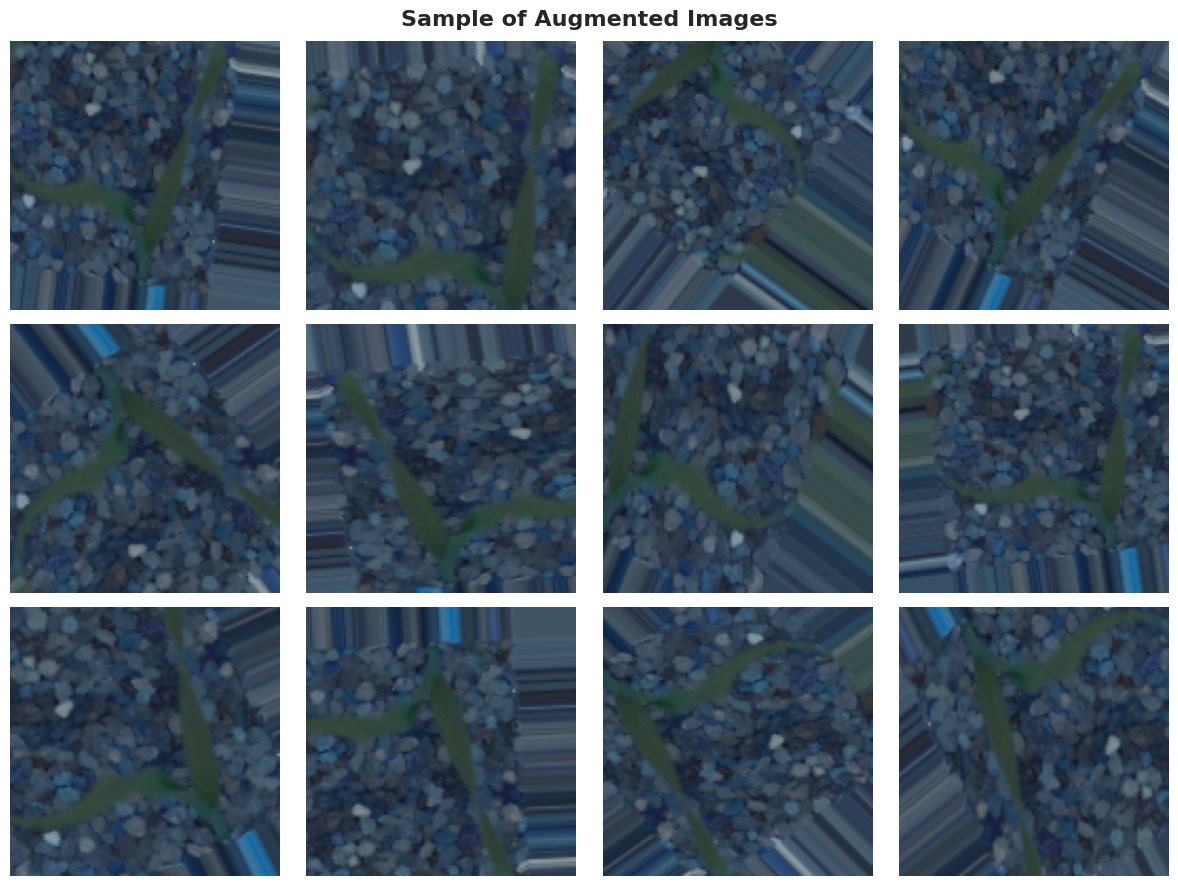

In [17]:
# Pick a single sample image to visualize
# The index chosen is arbitrary
sample_image = images_balanced[2710]

# The ImageDataGenerator expects a 4D array, so we need to add a 'batch' dimension
# This can be done with np.expand_dims
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Create a 3x4 grid for visualizations
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Sample of Augmented Images', fontsize=16, fontweight='bold')

# Generate and plot 12 augmented images
i = 0
for batch in datagen.flow(sample_image_expanded, batch_size=1):
    # The datagen.flow method returns batches of images.
    # Convert it to an unsigned 8-bit integer type for plotting.
    img = (batch[0]).astype('uint8')

    # Figure out the position in the grid
    ax = axes[i // 4, i % 4]
    ax.imshow(img)
    ax.axis('off') # Hide the axes

    i += 1
    if i >= 12:
        break

plt.tight_layout()
plt.show()

Finally, we'll save the data in its current format so that we can reimport it from future steps if necessary.

In [18]:
# --- Save the Balanced Data ---

# Save the images array to a .npy file to match the original file type
np.save('images_balanced.npy', images_balanced)

# Save the labels array to a .csv file
# Use the class_names created during encoding to save the actual text labels
if 'class_names' in locals():
    # Convert numeric labels back to string names for clarity in the CSV
    string_labels = class_names[labels_balanced]
    pd.DataFrame(string_labels, columns=['species']).to_csv('labels_balanced.csv', index=False)
else:
    # If for some reason class_names isn't available, save the numeric labels
    pd.DataFrame(labels_balanced, columns=['species']).to_csv('labels_balanced.csv', index=False)


print("Successfully saved 'images_balanced.npy' and 'labels_balanced.csv'.")

Successfully saved 'images_balanced.npy' and 'labels_balanced.csv'.


### B3. Normalization Steps

> Normalize the images and discuss the steps taken for normalization.

Before we feed our image data into the neural network, we need to **normalize** it. In their raw form, the pixels in our images have values ranging from 0 to 255, representing the intensity of the red, green, and blue (RGB) channels.

Normalizing this data is important for a couple of key reasons:

1. **Faster Convergence:** Neural networks train more efficiently when the input data is scaled to a small, standard range. Large input values can slow down the learning process, as the model's weights have to adjust to a much wider range of numbers.

2. **Improved Model Performance:** By scaling all the pixel values to be between 0 and 1, we ensure that each feature (in this case, each pixel) contributes equally to the model's learning. This prevents any single pixel with a very high value from disproportionately influencing the network's calculations.

The process is simple: we divide every pixel value in our dataset by `255.0`. This will scale the entire dataset from `[0, 255]` to the desired `[0, 1]` range.

In [19]:
# --- Load saved data to act as save point ---
images = np.load('images_balanced.npy')
labels = pd.read_csv('labels_balanced.csv')

In [20]:
# --- Normalize the image data ---
# Divide by 255.0 to scale the pixel values from the [0, 255] range to the
# [0, 1] range.

images_normalized = images / 255.0

# Verify the result by checking the min and max values
print(f"Minimum pixel value after normalization: {images_normalized.min()}")
print(f"Maximum pixel value after normalization: {images_normalized.max()}")
print(f"Shape of dataset: {images_normalized.shape}")

Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0
Shape of dataset: (7848, 128, 128, 3)


### B4. Train-Validation-Test Split

> Perform a train-validation-test split and justify your selection of the proportions for the split.

To properly train and evaluate our neural network, we must split our dataset into three distinct subsets: a **training set**, a **validation set**, and a **test set**. This separation is crucial for developing a model that generalizes well to new, unseen data and for accurately assessing its performance.

We will use a **70/15/15 split**, which means:

* **Training Set (70%):** This is the largest portion of the data and is used to train the model. The network learns the underlying patterns and features of the seedling images from this set by adjusting its internal weights.

* **Validation Set (15%):** This subset is used to fine-tune the model's hyperparameters and monitor its performance during the training process. By evaluating the model on data it hasn't been trained on, we can check for overfitting (when the model memorizes the training data but can't generalize to new, unseen data).

* **Test Set (15%):** This final, completely unseen set of data is used only after the model has been fully trained. It provides the most objective and unbiased measure of the model's true performance on real-world data.

This 70/15/15 distribution is a standard practice that provides enough data for robust training while reserving sufficient data for proper validation and a final, conclusive test.

Using the `train_test_split` method from **Scikit-Learn** allows a split up to four ways (X_train, X_test, y_train, y_test), so we will be applying it twice because we can't split it six ways (X_train, X_val, X_test, y_train, y_val, y_test) all in one go. We'll start by sectioning off the 70% reserved for the training data, leaving 30% to be used for validation and testing, referred to as `X_temp` and `y_temp` to start. Then the remaining 30% temp data will be split 50/50 to create our validation and test sets.

Even though we balanced our dataset in the previous step, we will still perform a **stratified split**. This technique ensures that the proportion of each seedling class is identical across all three sets (training, validation, and test), which is a best practice for robust model evaluation.

In [21]:
from sklearn.model_selection import train_test_split

# --- Train / Validation / Test Split ---
# Split into a 70% training set and a 30% temporary set (for validation + test)
# Use stratify=labels_balanced to ensure the class distribution is maintained
# across all splits
X_train, X_temp, y_train, y_temp = train_test_split(
    images_normalized,
    labels_balanced,
    test_size=0.30, # Reserve 30% of the data for validation and testing
    random_state=42, # Use a random state for reproducibility
    stratify=labels_balanced
)

# Split the 30% temporary set in half to get 15% validation and 15% test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50, # 50% of the temporary set (0.50 * 0.30 = 0.15 of the total)
    random_state=42, # Use the same random state for reproducibility
    stratify=y_temp
)
# Print the shapes of our new datasets to confirm the split
print("Data splitting complete.")
print(f"Training set shape:   {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test set shape:       {X_test.shape}, Labels shape: {y_test.shape}")

Data splitting complete.
Training set shape:   (5493, 128, 128, 3), Labels shape: (5493,)
Validation set shape: (1177, 128, 128, 3), Labels shape: (1177,)
Test set shape:       (1178, 128, 128, 3), Labels shape: (1178,)


### B5. Target Encoding

> Encode the target feature appropriately for all your datasets and discuss the steps taken.

### B6. Datasets Copy

## C & D - skip (not relevant to this dataset)

## E. Description of Neural Network

### E1. Model Summary Output

### E2. Neural Network Components

#### E2a. Number of Layers

#### E2b. Types of Layers

#### E2c. Nodes per Layer

#### E2d. Number of Parameters

#### E2e. Activation Functions

### E3. Backpropagation Process and Hyperparameter Justification

#### E3a. Loss Function

#### E3b. Optimizer

#### E3c. Learning Rate

#### E3d. Stopping Criteria

## F. Model Analysis

### F1. Evaluation of Model Training Process

#### F1a. Stopping Criteria Impact

#### F1b. Evaluation Metrics

#### F1c. Visualization

### F2. Model Fitness

### F3. Predictive Accuracy

## G. Summary of Results

### G1. Code

### G2. Neural Network Functionality

### G3. Business Problem Alignment

### G4. Model Improvement

### G5. Recommended Course of Action

## H. Output

## I. Sources for Third-Party Code

* [TensorFlow Documentation - ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

## J. Sources

* Bourke, D. (2025). _TensorFlow for Deep Learning Bootcamp: Zero to Mastery_. Zero to Mastery. https://zerotomastery.io/courses/learn-tensorflow/